# Understanding CLIP and Contrastive Learning

### By Ishan Gupta

## Motivation

I selected **CLIP** and **contrastive learning** as my focus because of the transformative impact this approach has had on connecting visual and linguistic understanding in artificial intelligence. The elegance of the solution—training models to recognize relationships between images and text descriptions without requiring manually labeled datasets—presents a fascinating paradigm shift in machine learning methodology.

What particularly drew me to this topic was how **CLIP** demonstrates that models can develop robust visual concept understanding through natural language supervision, potentially bypassing traditional supervised learning bottlenecks. This approach offers promising directions for creating more flexible AI systems that can generalize to new tasks without explicit training.

## Historical Perspective

**Multimodal learning** has evolved significantly over the past decade. Early approaches typically involved specialized architectures designed for specific tasks like **image captioning** or **visual question answering**, often requiring task-specific datasets with carefully constructed annotations.

Frameworks like `SimCLR` and `MoCo` demonstrated that models could learn powerful representations by contrasting similar and dissimilar examples within one domain (typically images). These approaches showed that contrastive objectives could create meaningful feature spaces without human annotations.

**CLIP** represented a significant advancement by extending contrastive learning across modalities—connecting visual and textual spaces using naturally occurring image-text pairs gathered from the internet. This innovation eliminated the need for expensive human-labeled datasets while scaling to hundreds of millions of training examples.

## Natural Language as a Flexible Supervision Signal

The flexibility of natural language as a supervision signal represents one of CLIP's most significant innovations. Let me elaborate on why this approach is so powerful:

### Beyond Traditional Classification Labels
Traditional computer vision systems rely on rigid classification structures—images must be sorted into predefined categories like "cat," "dog," or "chair." This approach:

1. Requires extensive manual labeling
2. Limits models to recognizing only predefined classes
3. Creates artificial boundaries between conceptual categories
4. Struggles with nuanced distinctions or overlapping concepts

Natural language descriptions, by contrast, can express virtually unlimited visual concepts without requiring formal taxonomies. When CLIP learns from image-text pairs, it encounters descriptions like "a tabby cat sleeping on a windowsill" or "an antique wooden chair with ornate carvings," which contain rich contextual information

### Capturing Semantic Relationships
Language naturally encodes semantic relationships between concepts. Consider these examples:

1. "A rusty vintage bicycle leaning against a brick wall"
2. "A modern carbon fiber racing bike on a mountain trail"

Both descriptions reference bicycles but contain crucial qualifiers about materials, age, style, and setting. Through exposure to millions of such descriptions, CLIP implicitly learns:

1. That "bicycle," "bike," and "cycle" refer to similar objects
2. The visual differences between "vintage" and "modern" objects
3. What "rusty" means as a visual property across different items
4. How context ("brick wall" vs. "mountain trail") relates to object types

This semantic richness allows CLIP to develop a much more nuanced understanding of visual concepts than would be possible through simple category 
labels.

### Cultural and Contextual Knowledge

Text descriptions often contain cultural references, metaphors, and contextual information that go beyond literal visual content:

1. "A scene reminiscent of Renaissance paintings"
2. "A dystopian cityscape"
3. "A comforting winter scene"

By learning from such descriptions, CLIP develops associations between visual patterns and cultural concepts, enabling it to understand images at a more conceptual level than purely visual systems.

## The Contrastive Objective and Unified Embedding Space

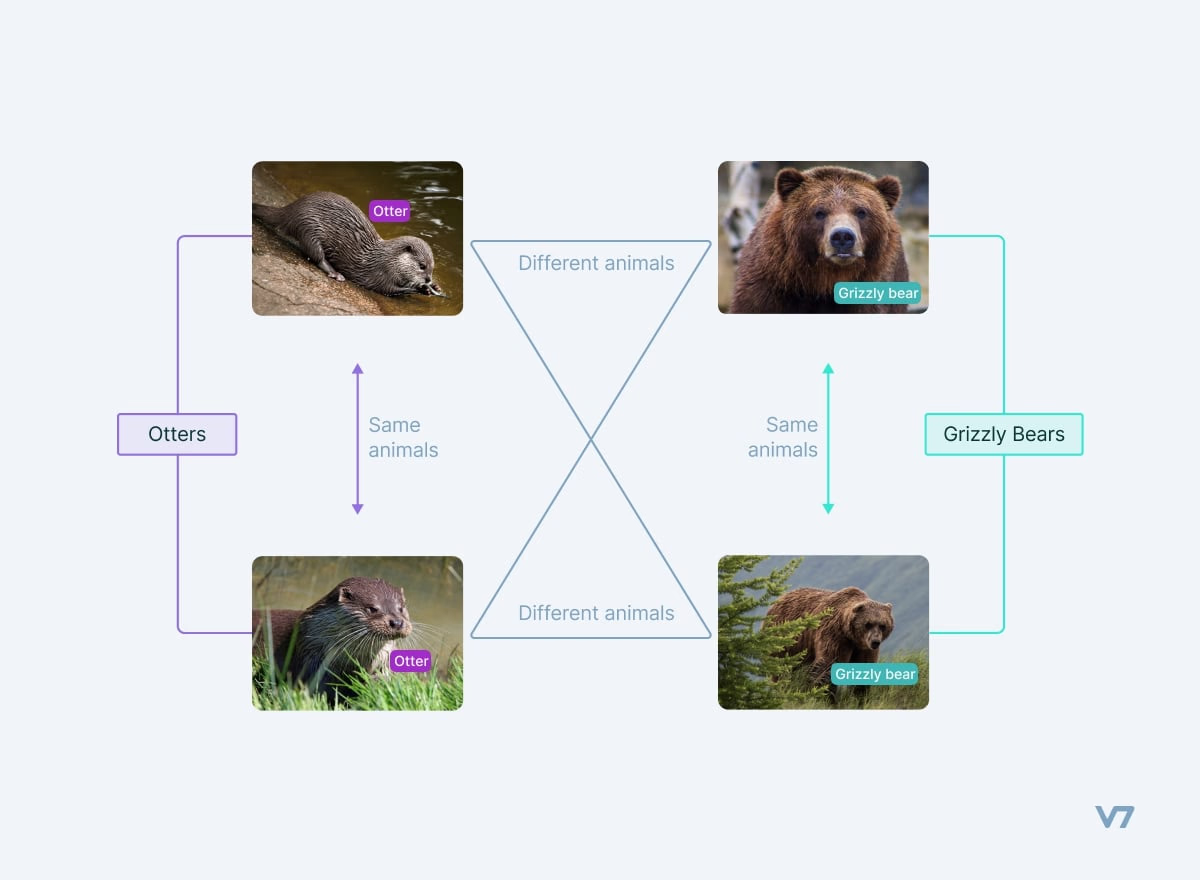

### Core Principles of Contrastive Learning in CLIP

The contrastive objective is the mathematical foundation that powers CLIP's ability to connect images and text in a meaningful way. This approach works by:

1. Embedding both images and text into a shared high-dimensional vector space
2. Maximizing similarity between paired images and their descriptions
3. Simultaneously minimizing similarity between unrelated image-text pairs

Let's explore how this creates a unified semantic space and enables powerful capabilities

### Creating a Unified Embedding Space

When we talk about a "unified embedding space," we're referring to a mathematical representation where both images and text exist as vectors in the same dimensional space. Here's what makes this space special:

#### Semantic Proximity = Geometric Proximity
The contrastive objective enforces a critical property: items with similar meanings end up positioned close together in this space, while dissimilar concepts remain far apart. This applies regardless of whether the original input was an image or text.
For example:

1. An image of a cat and the text "a photograph of a cat" will have embeddings near each other
2. Both will be far from embeddings of an image showing a skyscraper or text describing architecture

### Cross-Modal Alignment

The true power comes from how this objective aligns the two modalities. Consider what happens during training:

- CLIP processes a batch containing multiple image-text pairs
- For each image, its embedding should be closest to its paired text description
- For each text description, its embedding should be closest to its paired image
- All other pairings (incorrect matches) should have lower similarity scores

Through this process, the model learns to map semantically equivalent content from different modalities to approximately the same region in the embedding space. This alignment is subtle and complex:

* Images of dogs and texts about dogs will cluster in the same general region
* Within that region, specific breeds or contexts will form sub-clusters
* Abstract concepts like "happiness" will align with images that convey joy
* Visual attributes like "rusty" or "shiny" will have consistent locations in the space

### Mathematical Implementation

The contrastive objective is typically implemented using a **temperature-scaled symmetric cross-entropy loss**. For each batch of N image-text pairs:

1. Compute similarity scores between all possible N×N image-text combinations
2. For each image, the loss encourages high similarity with its paired text and low similarity with all other texts
3. For each text, the loss encourages high similarity with its paired image and low similarity with all other images

The "temperature" parameter controls how strictly the model enforces these constraints, balancing between perfect discrimination and generalization ability.

## Datasets Used

I've come to appreciate the critical importance of scale. CLIP's performance demonstrates that both model size and dataset size contribute substantially to capability improvements. The 400 million image-text pairs used for training provided sufficient diversity to enable generalization across domains.

### 1. Training Dataset: Web-Scraped Image-Text Pairs

CLIP is trained on a large, diverse dataset of 400 million (image, text) pairs collected from the internet.

- These pairs are not manually labeled.

- Instead, they come from publicly available sources where images and their natural language descriptions are found together — such as websites with alt-text captions.

- This dataset is proprietary, and its exact composition is not released, but it is designed to be broad and general, covering a wide range of visual concepts and categories.

### 2. Evaluation Datasets
CLIP is evaluated across 30+ publicly available benchmarks, including:

| Task                 | Example Datasets                                 |
| -------------------- | ------------------------------------------------ |
| Image Classification | ImageNet, CIFAR-10, Food-101, SUN397             |
| OCR                  | SVHN, MNIST, USPS                                |
| Fine-grained         | Oxford Flowers-102, FGVC Aircraft, Stanford Cars |
| Activity Recognition | UCF101, Kinetics700                              |
| Satellite Imagery    | RESISC45                                         |
| Sketch Recognition   | Sketch                                           |

### Training Process


 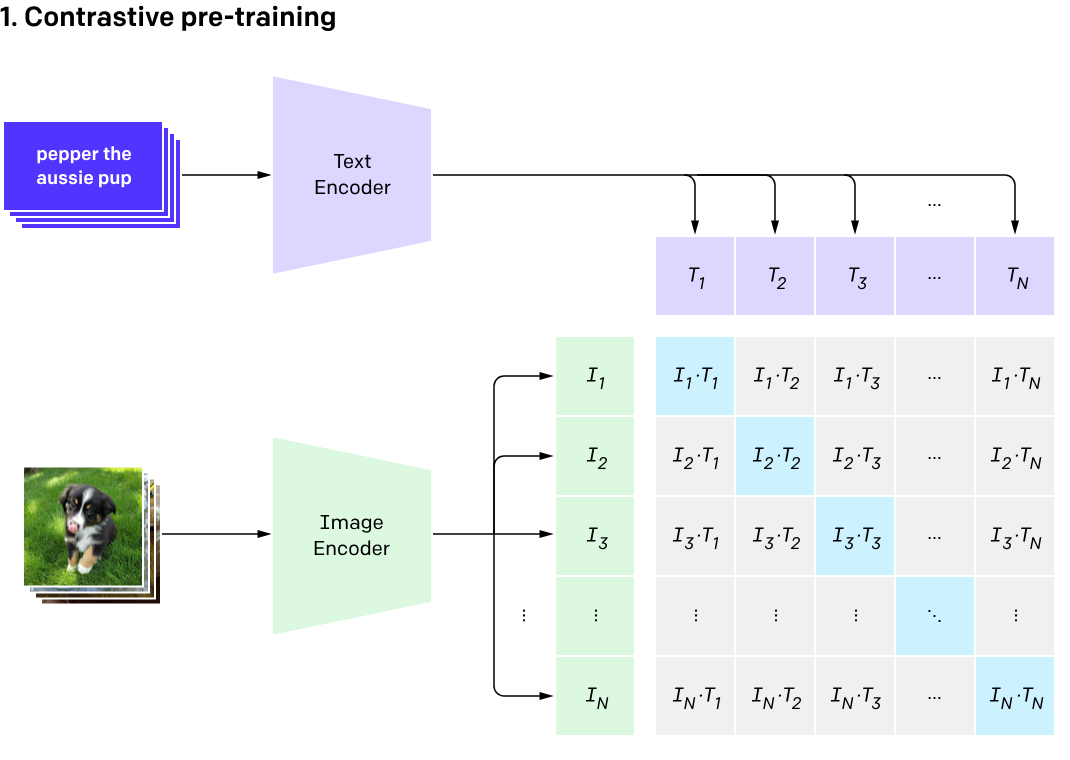 

CLIP uses two main components:

- **Image Encoder**: Either a ResNet-50/101 or a Vision Transformer (ViT).

- **Text Encoder**: A Transformer model similar to GPT.

Both encoders map their respective modalities into a shared embedding space.

They use a very large minibatch size of 32,768.

## Enabling Zero-Shot Classification

This unified embedding space directly enables zero-shot classification without additional training:

1. To classify an image into one of several classes, we first convert each class name into text (e.g., "a photo of a [class]")
2. We embed both the image and all class texts into the shared space
3. We measure the similarity between the image embedding and each class text embedding
4. The class with the highest similarity score is the prediction

This works because the contrastive objective has taught the model to place images close to textual descriptions that accurately represent their content.

**Several powerful properties emerge from this architecture**:

### Analogical Reasoning

The embedding space often preserves analogical relationships. The classic example from word embeddings "king - man + woman = queen" can have visual counterparts in CLIP's space, allowing for creative exploration of the visual-semantic landscape.

### Transfer Between Modalities
Perhaps most importantly, the space allows for seamless transfer between modalities. A concept learned primarily through visual examples can be accessed through language and vice versa, enabling powerful generalization beyond the training data.
This unified embedding space, shaped by the contrastive objective, is what gives CLIP its remarkable flexibility and generalization capabilities, allowing it to perform tasks it was never explicitly trained for and to understand visual concepts described in natural language.

###  Performance Analysis of Zero-Shot CLIP

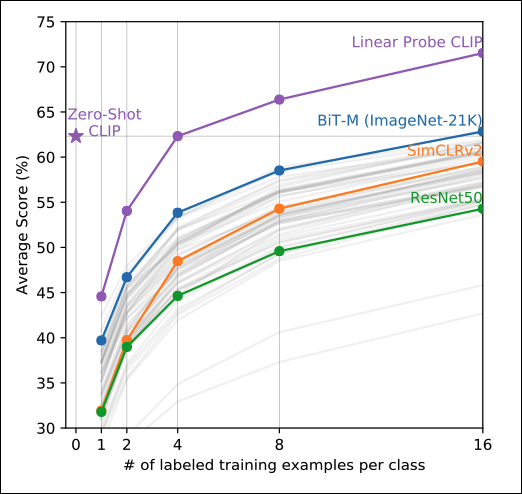

**Zero-shot CLIP outperforms few-shot linear probes.**
Zero-shot CLIP matches the average performance of a 4-shot linear
classifier trained on the same feature space and nearly matches the
best results of a 16-shot linear classifier across publicly available
models. For both BiT-M and SimCLRv2, the best performing
model is highlighted. Light gray lines are other models in the eval
suite. The 20 datasets with at least 16 examples per class were
used in this analysis

## Coding Demonstration

I have used `Flickr8K` dataset for this demonstration. A new benchmark collection for sentence-based image description and search, consisting of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events. … The images were chosen from six different Flickr groups, and tend not to contain any well-known people or locations, but were manually selected to depict a variety of scenes and situations. 

The goal is to simulate a miniature version of the CLIP framework. In this experiment, I use a **BERT Transformer** as the text encoder and **ResNet-18** as the image encoder. The dataset is divided into training and testing splits, and the model is trained using a contrastive loss to align image and text representations in a shared embedding space.

In [1]:
pip install torch torchvision transformers --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have 

Since this dataset has five labels per image , so for training , we randomly sample a label out of the five labels for an image.

In [2]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
from transformers import DistilBertTokenizer, DistilBertModel
from torch.utils.data import Dataset, DataLoader, random_split

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths
image_folder = '/kaggle/input/flickr8k/Images'
caption_file = '/kaggle/input/flickr8k/captions.txt'

# Load captions
with open(caption_file, 'r') as f:
    lines = f.readlines()[1:]

# Parse captions
image_captions = {}
for line in lines:
    parts = line.strip().split(',')
    if len(parts) == 2:
        image_id, caption = parts
        
        if image_id in image_captions:
            image_captions[image_id].append(caption)
        else:
            image_captions[image_id] = [caption]

# Create dataset
class FlickrDataset(Dataset):
    def __init__(self, image_folder, image_captions, transform, tokenizer, max_length=32):
        self.image_folder = image_folder
        self.image_captions = list(image_captions.items())
        self.transform = transform
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.image_captions)

    def __getitem__(self, idx):
        image_id, captions = self.image_captions[idx]
        image_path = os.path.join(self.image_folder, image_id)
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)

        caption = random.choice(captions)
        encoding = self.tokenizer(caption, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)

        return image, input_ids, attention_mask

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Full dataset
dataset = FlickrDataset(image_folder, image_captions, transform, tokenizer)

2025-05-08 10:30:23.620693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746700223.857940      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746700223.924171      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Simple example to understand tokenization.

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
inputs = tokenizer("Hello world", padding="max_length", max_length=10, return_tensors="pt")

print(inputs["input_ids"])
print(inputs["attention_mask"])  

tensor([[ 101, 7592, 2088,  102,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])


Some sample examples

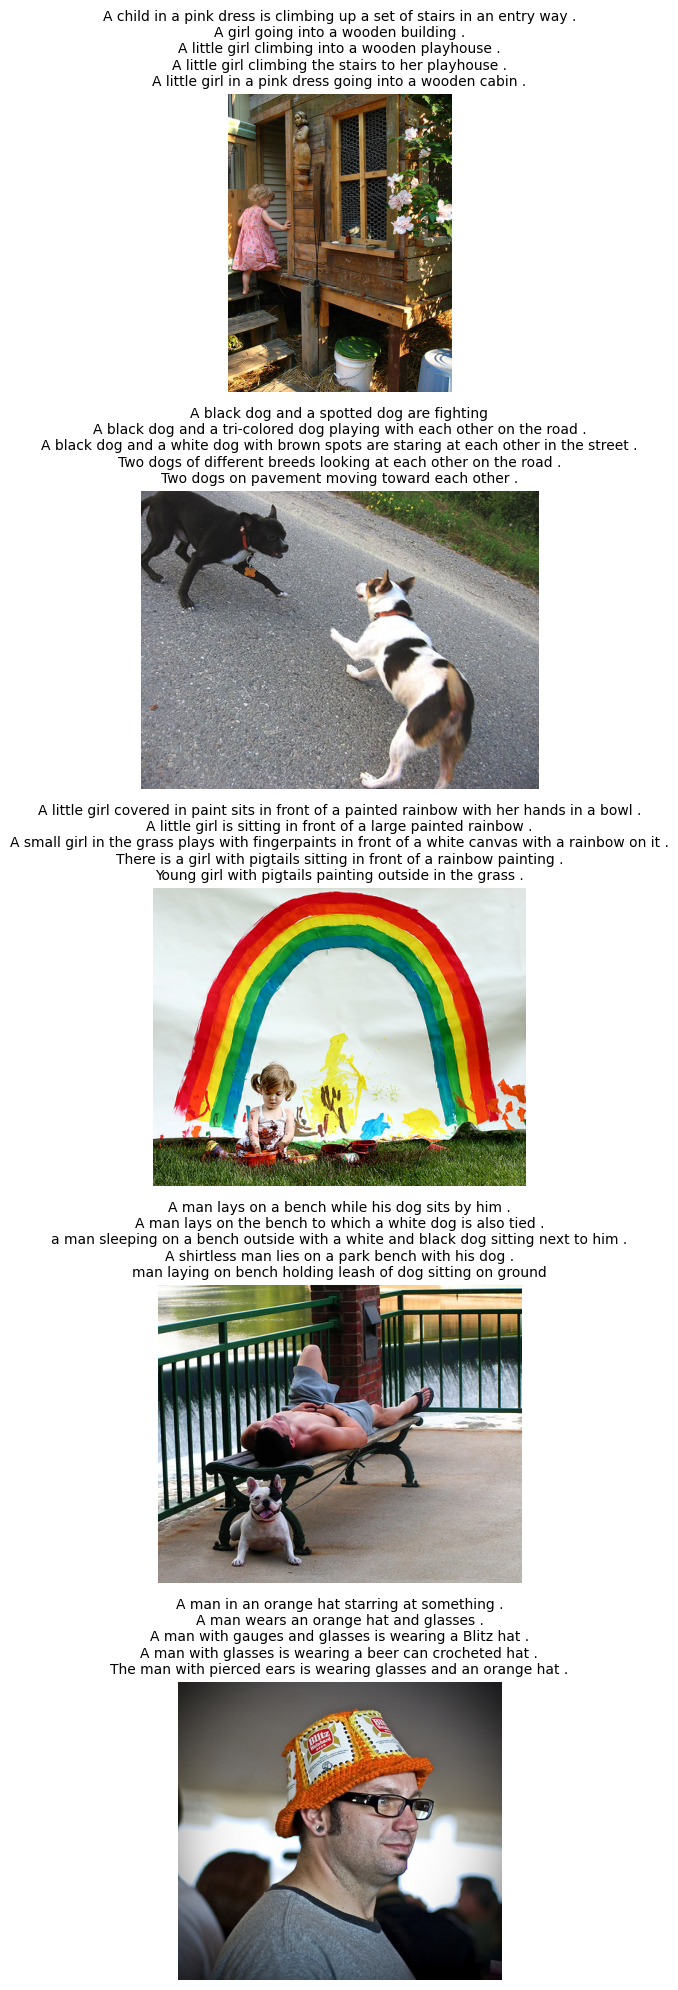

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

def show_image_with_captions(image_id, image_folder, captions, num_images=5):
    """
    Show a few images and all their captions.
    """
    plt.figure(figsize=(10, 4 * num_images))

    for idx, (img_id, caption_list) in enumerate(list(captions.items())[:num_images]):
        img_path = os.path.join(image_folder, img_id)
        image = Image.open(img_path).convert('RGB')

        plt.subplot(num_images, 1, idx + 1)
        plt.imshow(image)
        plt.axis('off')
        caption_text = "\n".join(caption_list)
        plt.title(f"{caption_text}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Example usage:
show_image_with_captions(image_id=None, image_folder=image_folder, captions=image_captions, num_images=5)

In [5]:
# Train-test split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [6]:
# Image Encoder
class ImageEncoder(nn.Module):
    def __init__(self, embed_size):
        super(ImageEncoder, self).__init__()
        resnet = models.resnet18(pretrained=True)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.fc = nn.Linear(resnet.fc.in_features, embed_size)

        for param in self.resnet.parameters():
            param.requires_grad = False

    def forward(self, images):
        features = self.resnet(images).squeeze()
        features = self.fc(features)
        return features

# Text Encoder
class TextEncoder(nn.Module):
    def __init__(self, embed_size):
        super(TextEncoder, self).__init__()
        self.bert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.fc = nn.Linear(self.bert.config.hidden_size, embed_size)

        for param in self.bert.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        features = self.fc(cls_output)
        return features


In [7]:
# CLIP Model
class CLIPModel(nn.Module):
    def __init__(self, embed_size):
        super(CLIPModel, self).__init__()
        self.image_encoder = ImageEncoder(embed_size)
        self.text_encoder = TextEncoder(embed_size)
        self.temperature = nn.Parameter(torch.tensor(1.0))

    def forward(self, images, input_ids, attention_mask):
        image_features = self.image_encoder(images)
        text_features = self.text_encoder(input_ids, attention_mask)
        image_features = F.normalize(image_features, dim=1)
        text_features = F.normalize(text_features, dim=1)
        logits = image_features @ text_features.T * torch.exp(self.temperature)
        return logits

# Initialize model
embed_size = 256
model = CLIPModel(embed_size).to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s] 
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingf

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Model performance with Pre-trained weights

In [8]:
# Basic test evaluation (image-text retrieval quality check)
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, input_ids, attention_mask in test_loader:
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        logits = model(images, input_ids, attention_mask)
        preds = logits.argmax(dim=1)
        labels = torch.arange(len(images)).to(device)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    print(f"Test Accuracy (top-1 matching): {correct / total:.4f}")


Test Accuracy (top-1 matching): 0.0309


In [9]:
# Optimizer: Only projection heads and temperature param
optimizer = torch.optim.Adam([
    {'params': model.image_encoder.fc.parameters()},
    {'params': model.text_encoder.fc.parameters()},
    {'params': model.temperature}
], lr=1e-4)

# Loss
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(30):
    model.train()
    total_loss = 0
    for images, input_ids, attention_mask in train_loader:
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        logits = model(images, input_ids, attention_mask)
        labels = torch.arange(len(images)).to(device)

        loss_i = criterion(logits, labels)
        loss_t = criterion(logits.T, labels)
        loss = (loss_i + loss_t) / 2

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/30], Loss: {avg_loss:.4f}")


Epoch [1/30], Loss: 3.0597
Epoch [2/30], Loss: 2.6646
Epoch [3/30], Loss: 2.5168
Epoch [4/30], Loss: 2.4284
Epoch [5/30], Loss: 2.3640
Epoch [6/30], Loss: 2.3171
Epoch [7/30], Loss: 2.2618
Epoch [8/30], Loss: 2.2173
Epoch [9/30], Loss: 2.1682
Epoch [10/30], Loss: 2.1469
Epoch [11/30], Loss: 2.1176
Epoch [12/30], Loss: 2.0712
Epoch [13/30], Loss: 2.0586
Epoch [14/30], Loss: 2.0157
Epoch [15/30], Loss: 1.9817
Epoch [16/30], Loss: 1.9670
Epoch [17/30], Loss: 1.9469
Epoch [18/30], Loss: 1.9162
Epoch [19/30], Loss: 1.8797
Epoch [20/30], Loss: 1.8821
Epoch [21/30], Loss: 1.8498
Epoch [22/30], Loss: 1.8268
Epoch [23/30], Loss: 1.7957
Epoch [24/30], Loss: 1.7682
Epoch [25/30], Loss: 1.7501
Epoch [26/30], Loss: 1.7436
Epoch [29/30], Loss: 1.6842
Epoch [30/30], Loss: 1.6554


Top-1 accuracy after fine-tuning the projection head on the training data.

In [10]:
# Basic test evaluation (image-text retrieval quality check)
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, input_ids, attention_mask in test_loader:
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        logits = model(images, input_ids, attention_mask)
        preds = logits.argmax(dim=1)
        labels = torch.arange(len(images)).to(device)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    print(f"Test Accuracy (top-1 matching): {correct / total:.4f}")


Test Accuracy (top-1 matching): 0.5244


We observe that we get a good accuracy even when training on this small dataset.

Now increasing the batch size to train the model on complete dataset at once.

In [11]:
train_loader = DataLoader(train_dataset, batch_size=len(train_loader), shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_loader))

In [12]:
# Optimizer: Only projection heads and temperature param
optimizer = torch.optim.Adam([
    {'params': model.image_encoder.fc.parameters()},
    {'params': model.text_encoder.fc.parameters()},
    {'params': model.temperature}
], lr=1e-4)

# Loss
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, input_ids, attention_mask in train_loader:
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        logits = model(images, input_ids, attention_mask)
        labels = torch.arange(len(images)).to(device)

        loss_i = criterion(logits, labels)
        loss_t = criterion(logits.T, labels)
        loss = (loss_i + loss_t) / 2

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/10], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 3.3192
Epoch [2/10], Loss: 3.3040
Epoch [3/10], Loss: 3.3148
Epoch [4/10], Loss: 3.2921
Epoch [5/10], Loss: 3.2809
Epoch [6/10], Loss: 3.2819
Epoch [7/10], Loss: 3.2827
Epoch [8/10], Loss: 3.2722
Epoch [9/10], Loss: 3.2814
Epoch [10/10], Loss: 3.2604


In [13]:
# Basic test evaluation (image-text retrieval quality check)
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, input_ids, attention_mask in test_loader:
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        logits = model(images, input_ids, attention_mask)
        preds = logits.argmax(dim=1)
        labels = torch.arange(len(images)).to(device)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    print(f"Test Accuracy (top-1 matching): {correct / total:.4f}")


Test Accuracy (top-1 matching): 0.4460


In [14]:
# Top-5 Accuracy Evaluation
model.eval()
with torch.no_grad():
    correct_top5 = 0
    total = 0
    for images, input_ids, attention_mask in test_loader:
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        logits = model(images, input_ids, attention_mask)

        # Get top-5 predictions for each sample
        top5_preds = logits.topk(5, dim=1).indices  # shape: [batch_size, 5]

        # Construct ground-truth labels (assuming identity match)
        labels = torch.arange(len(images)).to(device)

        # Check if the correct label is among top 5 predictions
        for i in range(len(labels)):
            if labels[i] in top5_preds[i]:
                correct_top5 += 1

        total += labels.size(0)

    print(f"Test Accuracy (top-5 matching): {correct_top5 / total:.4f}")


Test Accuracy (top-5 matching): 0.8227


We observe that the Top-5 accuracy is quite good and it also shows that model is learning semantic relationships though not that clear ones.

## Comparing the performance with CLIP model

In [19]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").eval().to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [20]:
class FlickrEvalDataset(Dataset):
    def __init__(self, image_folder, image_captions, transform):
        self.image_folder = image_folder
        self.image_captions = list(image_captions.items())
        self.transform = transform

    def __len__(self):
        return len(self.image_captions)

    def __getitem__(self, idx):
        image_id, captions = self.image_captions[idx]
        image_path = os.path.join(self.image_folder, image_id)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, captions  # Return all captions for this image


In [21]:
def evaluate_clip_topk(model, processor, dataset, device, top_k=5):
    model.eval()
    correct = 0
    total = 0

    for image, captions in tqdm(dataset):
        inputs = processor(text=captions, images=image, return_tensors="pt", padding=True).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits_per_image  # shape: [1, len(captions)]
            probs = logits.softmax(dim=1)

        # If any of the captions are in the top_k predictions, count as correct
        top_indices = torch.topk(probs, k=top_k, dim=1).indices.squeeze().tolist()
        if not isinstance(top_indices, list):
            top_indices = [top_indices]

        if any(i in top_indices for i in range(len(captions))):
            correct += 1

        total += 1

    accuracy = correct / total
    print(f"Top-{top_k} Image-to-Text Accuracy: {accuracy:.4f}")
    return accuracy

In [22]:
flickr_eval_dataset = FlickrEvalDataset("/kaggle/input/flickr8k/Images", image_captions, None)

evaluate_clip_topk(clip_model, clip_processor, flickr_eval_dataset, device, top_k=1)

100%|██████████| 8091/8091 [03:19<00:00, 40.66it/s]

Top-1 Image-to-Text Accuracy: 1.0000


1.0

The clip model gets 100% accuracy and performs better than our model. It was also expected because the CLIP model is trained on very large dataset.

## Reflections

The most surprising aspect of CLIP was its remarkable robustness to distribution shifts. Unlike traditional supervised models that often struggle when test data differs significantly from training examples, CLIP demonstrates considerable resilience when facing new visual domains. This suggests that learning from diverse, naturalistic data produces fundamentally different representations than those learned from curated datasets.
I was also struck by how effectively natural language serves as a supervision signal. The flexibility of language allows models to develop nuanced visual concepts that would be difficult to capture in traditional classification schemes.

### What can be the scope for improvement?

Despite its innovations, CLIP presents several opportunities for advancement:

- The model shows limitations in fine-grained recognition tasks, suggesting that general language descriptions might not always capture subtle visual distinctions. Developing methods to enhance detailed understanding without losing generality represents an important research direction.
- Addressing inherent biases in internet-sourced training data remains challenging. The model inevitably reflects biases present in its training material, which could perpetuate problematic associations. Methods for detecting and mitigating these biases need further development.
- The computational requirements for training such models remain substantial, limiting accessibility. Research into more efficient training approaches could democratize access to these powerful techniques.

## References:

1. Radford, A., et al. (2021). "Learning Transferable Visual Models From Natural Language Supervision." Proceedings of the 38th International Conference on Machine Learning.
2. Chen, T., et al. (2020). "A Simple Framework for Contrastive Learning of Visual Representations." Proceedings of the 37th International Conference on Machine Learning.

Images were taken from the Internet and the paper itself. 